In [28]:
%run "rossmann_01_preprocessing.ipynb"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   store                         1017209 non-null  int32         
 1   day_of_week                   1017209 non-null  int8          
 2   date                          1017209 non-null  datetime64[ns]
 3   sales                         1017209 non-null  int64         
 4   customers                     1017209 non-null  int32         
 5   open                          1017209 non-null  int8          
 6   promo                         1017209 non-null  int8          
 7   state_holiday                 1017209 non-null  category      
 8   school_holiday                1017209 non-null  int8          
 9   store_type                    1017209 non-null  category      
 10  assortment                    1017209 non-null  category      
 11

In [43]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
from datetime import datetime, time, date

from IPython.display       import Image
from IPython.core.display  import HTML

# EDA

**Content:**

* Hypothesis Mind Map
* Descriptive Statistical Table
* Store Status
* Sales Analysis
    - by Store Type
    - by Assortment
    - over Holidays
    - by Competition Distance 
    - by Promotion type
    - by day, month, year
    - Correlation
    


## Hypothesis Mind Map


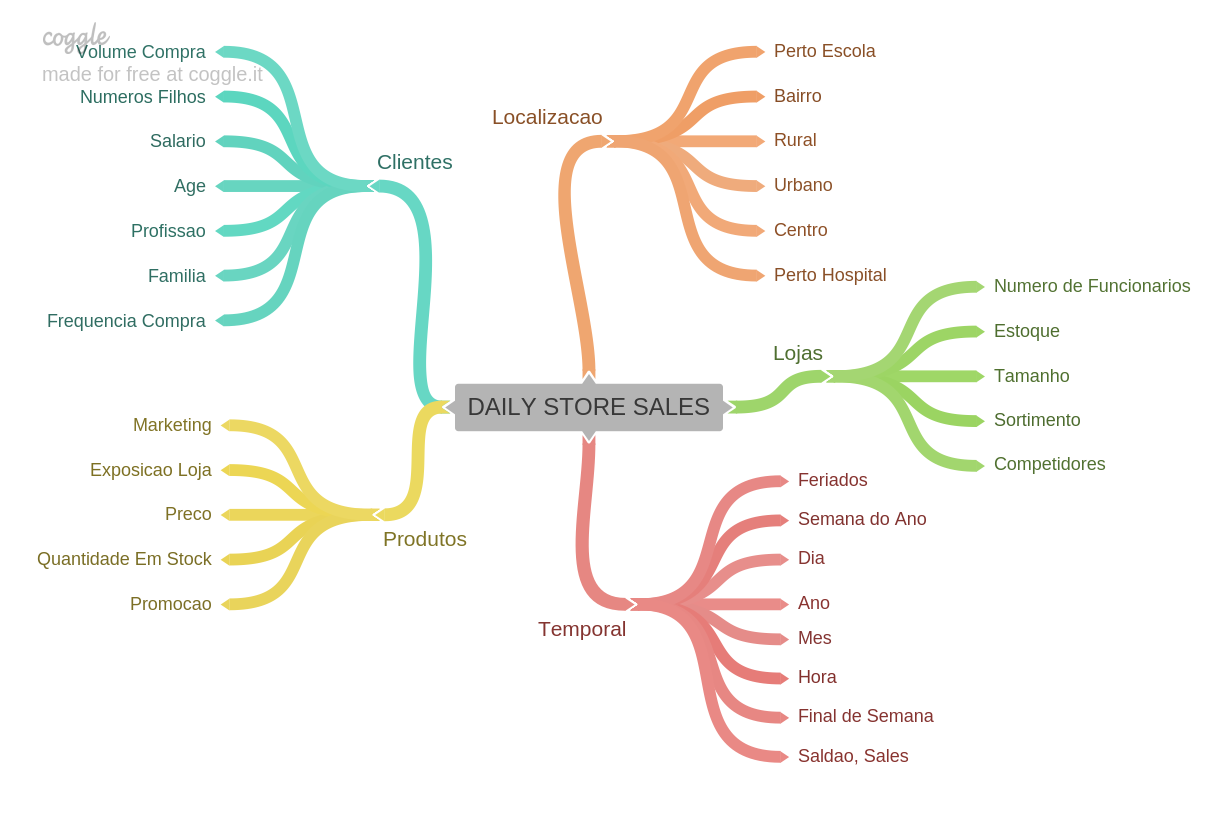

In [44]:
Image('../images/mind_map.png', width=750)

The hypotheses mind map outline our ideas and start the first negotiations of exploratory data analysis. In it we describe the phenomenon we are studying, in this case the daily sales of stores and agents, which we believe are the most relevant who work in this phenomenon and its main attributes.

##  Descriptive Statistics

In [45]:
num_attributes = data.select_dtypes(include=['int64', 'float64','int32','float32','int8'])
cat_attributes = data.select_dtypes(include=['object','category'])

# Central Tendency
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T
# Dispersion
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std','skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.179122,0.0,0.383455,1.673616,0.800991
7,competition_distance,20.0,75860.0,75840.0,5434.163196,2330.0,7705.708171,2.930306,13.032038
8,competition_open_since_month,1.0,12.0,11.0,7.469899,8.0,2.677242,-0.469882,-0.400513
9,competition_open_since_year,1900.0,2015.0,115.0,2009.106575,2010.0,4.986800,-9.170004,177.739211


In [46]:
data_eda=data.copy()

In [47]:
# This step should be done during pre-processing, but as in this project it will only be useful to help the visualization, 
# I prefer to do it in this notebook.

data_eda['state_holiday'].replace({'0':'Regular Day', 'a': 'Public Holiday', 'b': 'Easter Holiday', 'c': 'Christmas'}, inplace=True)
data_eda['assortment'].replace({'a': 'Basic', 'b': 'Extra', 'c': 'Extended'}, inplace=True)                                                        
data_eda['open'].replace({1 : 'Open', 0: 'Close'}, inplace=True)
data_eda['school_holiday'].replace( {0 : 'No', 1: 'Yes'}, inplace=True)

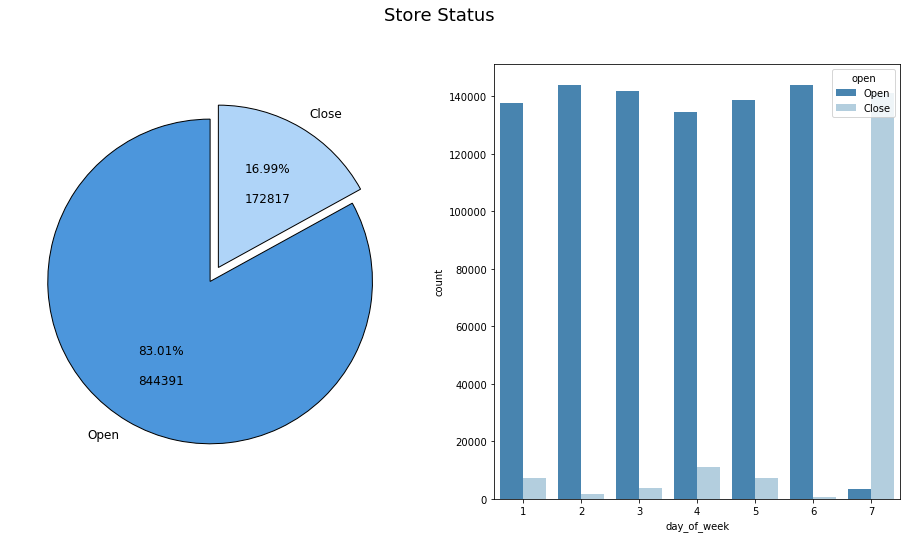

In [48]:
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.2f}%\n\n{:d}".format(pct, absolute) 

plt.figure(figsize=(16,8))
plt.suptitle('Store Status', fontsize=18)
plt.subplot(1, 2, 1)

labels = data_eda['open'].value_counts().index.tolist()
sizes = data_eda['open'].value_counts().tolist()

plt.pie(sizes, labels=labels, colors=['#4C96DC','#AFD4F8'], explode = (0, 0.1), autopct = lambda pct: func(pct, sizes), startangle=90,
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : "black"}, textprops={'fontsize': 12})
plt.subplot(1, 2, 2)
sns.countplot(x='day_of_week', hue='open', palette='Blues_r', data=data_eda)
plt.savefig("..//images//store_status.png")
plt.show()

It assumes that Rossmann do not open on Sundays except for special occasions and in specific stores.

Knowing the frequency that the stores are open/closed, the other analyzes will only consider the periods in which the stores are open and when there were any sales

In [49]:
data_eda=data_eda.loc[(data_eda['open'] == 'Open') & (data_eda['sales']>0)]

## Sales Analysis

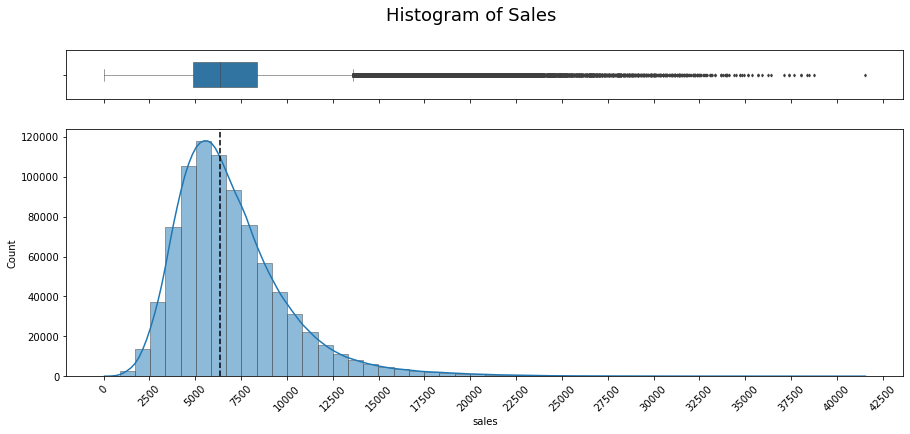

In [50]:
fig, (ax_box, ax_hist) = plt.subplots(2, figsize=(15,6), sharex=True, gridspec_kw = {"height_ratios": (0.2, 1)})
fig.suptitle('Histogram of Sales', fontsize=18)
sns.boxplot(x=data_eda['sales'], ax=ax_box, linewidth=.5, width=.5, fliersize=2)
ax_box.set(xlabel='')
sns.histplot(data=data_eda['sales'], ax=ax_hist, bins=50, kde=True, edgecolor=".3", linewidth=.5 )
ax_hist.axvline(data_eda['sales'].median(), color='black', ls='--')
plt.xticks(np.arange(0,45000,2500), rotation=45)
plt.savefig("..//images//sales_histogram.png")
plt.show()

In [51]:
#num_attributes.hist(figsize=(18,15), bins='auto');

In [52]:
num_attributes.nunique()

store                            1115
day_of_week                         7
sales                           21734
customers                        4086
open                                2
promo                               2
school_holiday                      2
competition_distance              655
competition_open_since_month       12
competition_open_since_year        23
promo2                              2
promo2_since_week                  25
promo2_since_year                   8
day                                31
month                              12
year                                3
day_of_year                       365
competition_open_since            336
promo_open_since                  105
is_promo_month                      2
dtype: int64

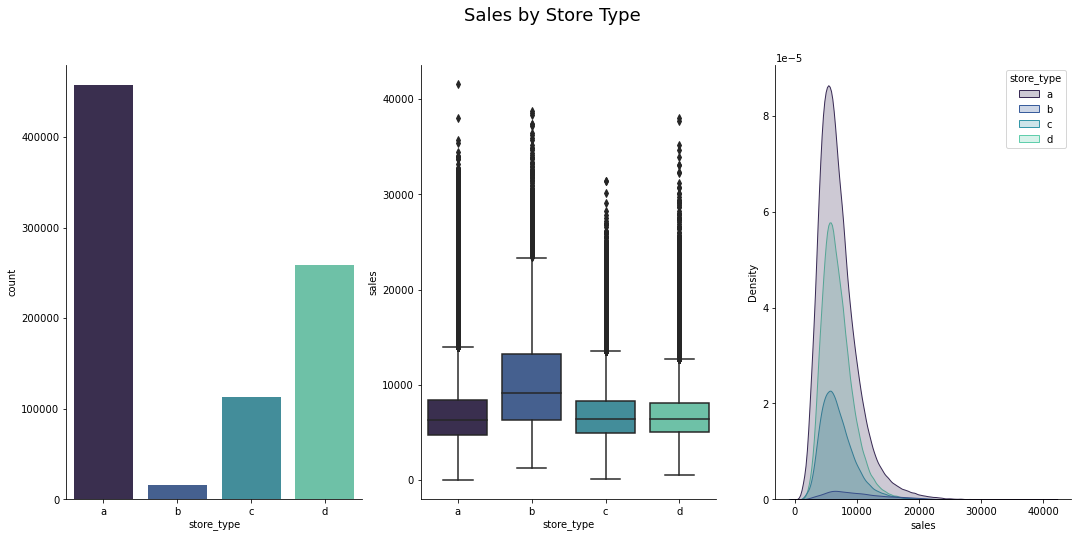

In [54]:
plt.figure(figsize=(18,8))
plt.suptitle('Sales by Store Type', fontsize=18)
plt.subplot(1, 3, 1)
sns.countplot(data=data_eda, x= 'store_type', palette='mako', order=["a","b","c","d"])
plt.subplot(1, 3, 2)
sns.boxplot(data=data_eda, x='store_type', y='sales', palette ='mako', order=["a","b","c","d"])
plt.subplot (1, 3, 3)
sns.kdeplot(data=data_eda, x='sales', hue='store_type', palette ='mako', shade=True)
sns.despine(left=False, bottom=False)
plt.savefig("..//images//sales_store_type.png")

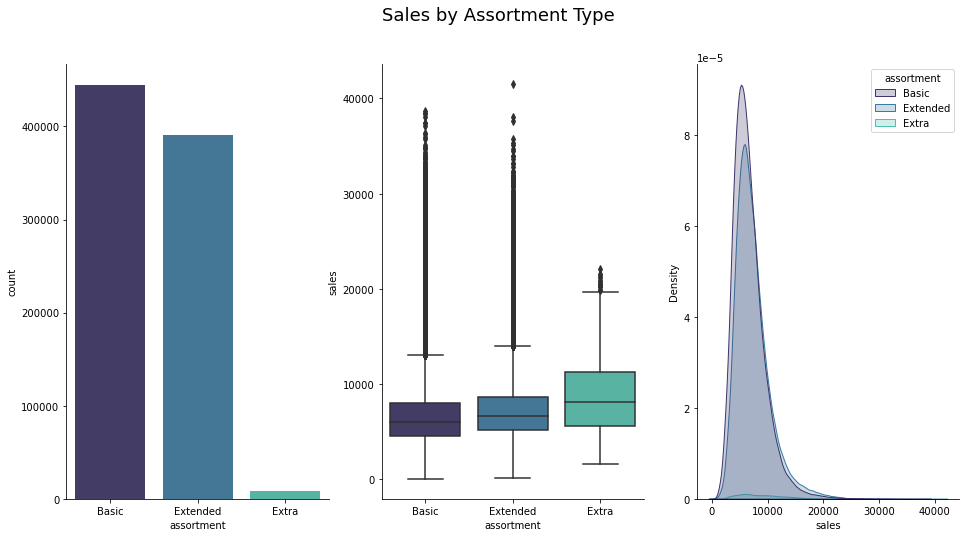

In [40]:
# assortment
plt.figure(figsize=(16,8))
plt.suptitle('Sales by Assortment Type', fontsize=18)
plt.subplot(1, 3, 1)
sns.countplot(data=data_eda, x= 'assortment', palette='mako')
plt.subplot(1, 3, 2)
sns.boxplot(data=data_eda, x='assortment', y='sales', palette ='mako')
plt.subplot (1, 3, 3)
sns.kdeplot(data= data_eda, x='sales', hue='assortment', palette ='mako', shade=True)
sns.despine(left=False, bottom=False)

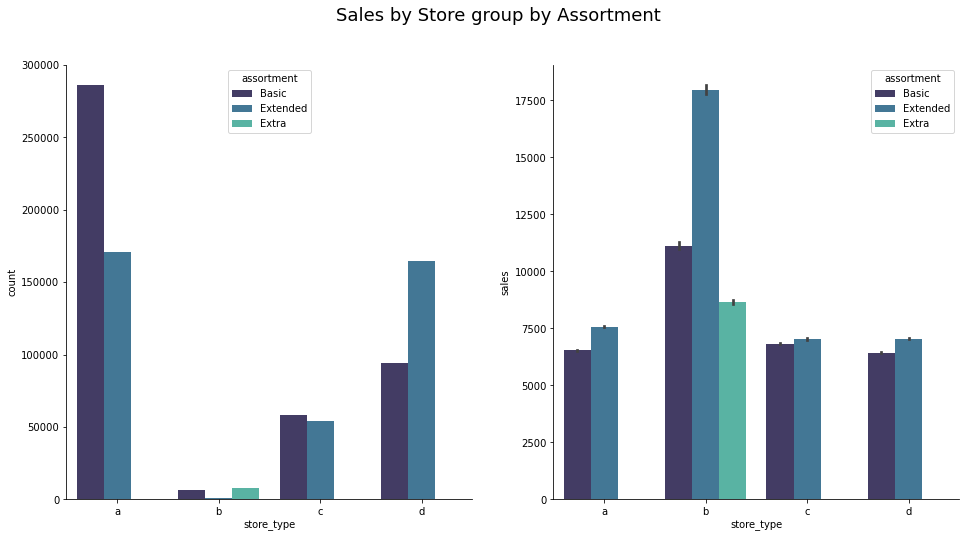

In [57]:
plt.figure(figsize=(16,8))
plt.suptitle('Sales by Store group by Assortment', fontsize=18)
plt.subplot(1, 2, 1)
sns.countplot(data = data_eda, x = "store_type", hue = "assortment", palette="mako", order=["a","b","c","d"]) 
plt.subplot(1, 2, 2)
sns.barplot(data = data_eda, x = "store_type", y='sales', palette="mako", hue = "assortment", order=["a","b","c","d"]) 
sns.despine(left=False, bottom=False)
plt.savefig("..//images//sales_assortment.png")

In [60]:
zipsorted = pd.DataFrame(data.groupby('store')['sales'].mean().sort_values(ascending=False))
zipsorted['rank'] = np.divmod(np.arange(len(zipsorted)), 1)[0]+1
zipsorted

,sales,rank
store,,
262,20718.515924,1
817,18108.139066,2
562,17969.556263,3
1114,17200.196391,4
251,15814.087049,5
...,...,...
841,2461.395966,1111
208,2443.791932,1112
198,2407.933121,1113


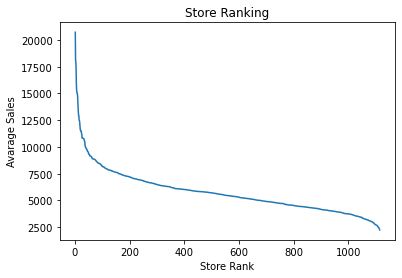

In [64]:
plt.title('Store Ranking')
sns.lineplot(x='rank', y='sales', data=zipsorted) 
plt.xlabel('Store Rank')
plt.ylabel('Avarage Sales') 
plt.savefig("..//images//sales_rank.png")
plt.show()

Apparently store "B" is Rossmann's most complete store, it is the only one that provides all types of assortment and is the one with the highest average sales, however it is a store with few units in Europe.

Type A store is Rossmann's most common.

The difference in sales from largest to smallest store is more than almost 10x.

<hr>

# Sales by Competition Distance

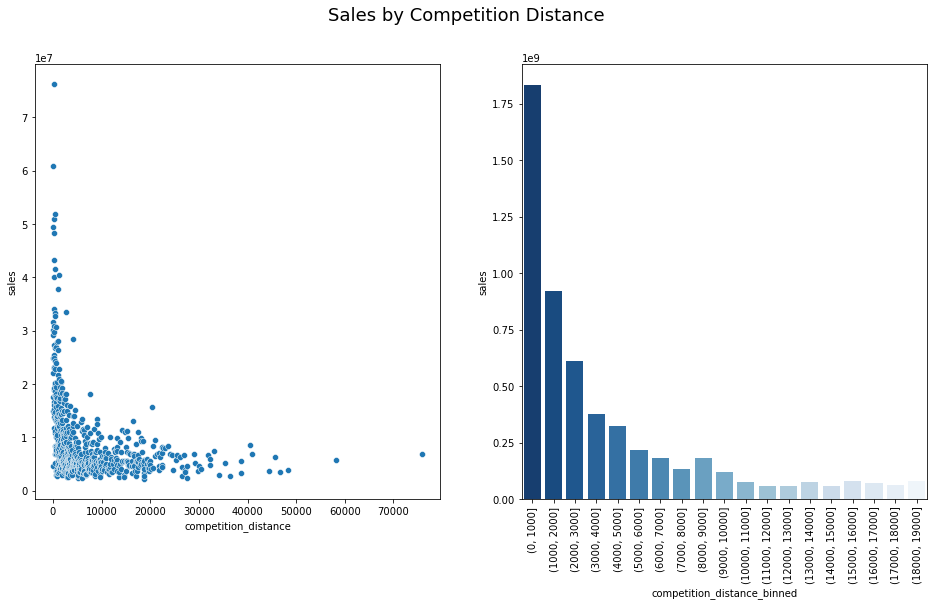

In [66]:
aux_comp = data[['competition_distance', 'sales']].groupby('competition_distance').sum().reset_index()
bins = list(np.arange( 0, 20000, 1000))
aux_comp['competition_distance_binned'] = pd.cut( aux_comp['competition_distance'], bins=bins )
aux_comp_binned = aux_comp[['competition_distance_binned', 'sales']].groupby( 'competition_distance_binned' ).sum().reset_index()
plt.figure(figsize=(16,8))
plt.suptitle('Sales by Competition Distance', fontsize=18)
plt.subplot(1, 2, 1)
sns.scatterplot( x ='competition_distance', y='sales', palette ='Blues_r', data=aux_comp );
plt.subplot(1, 2, 2)
sns.barplot( x='competition_distance_binned', y='sales', palette ='Blues_r', data=aux_comp_binned );
plt.xticks( rotation=90 );
plt.savefig("..//images//sales_competition_distance.png")

This is a good insight. The more competitors nearby, the greater the sales, which is perhaps a bit counter-intuitive at first.

### Sales an State/School Holidays

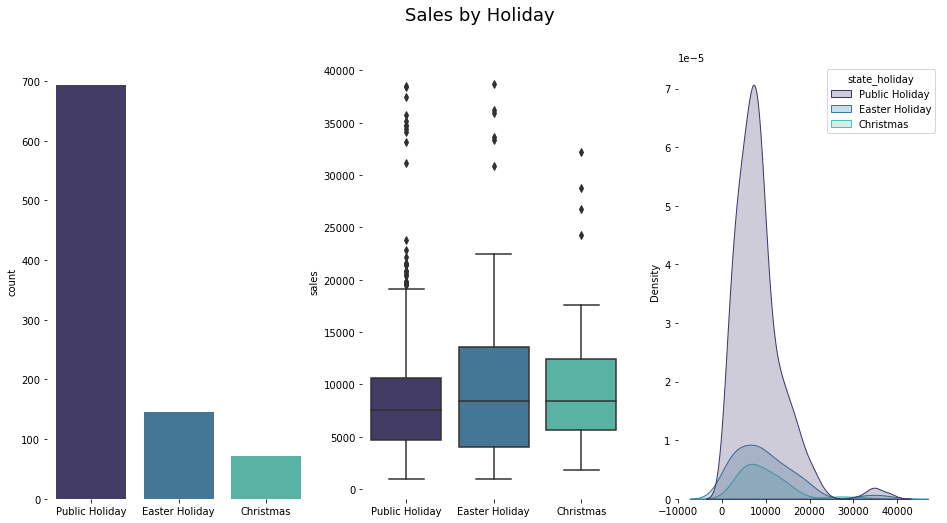

In [15]:
aux_holiday=data_eda.query("state_holiday != 'Regular Day'")
plt.figure(figsize=(16,8))
data_eda.query("state_holiday != 'Regular Day'")
plt.suptitle('Sales by Holiday', fontsize=18)
plt.subplot(1, 3, 1)
sns.countplot(data=aux_holiday, x= 'state_holiday', palette='mako')
plt.xlabel("")
plt.subplot(1, 3, 2 )
sns.boxplot(data=aux_holiday, x='state_holiday', y='sales', palette ='mako')
plt.xlabel("")
plt.subplot (1, 3, 3)
sns.kdeplot(data=aux_holiday, x='sales', hue='state_holiday', palette ='mako', shade=True)
plt.xlabel("")
sns.despine(left=True, bottom=True)

Note that from rank 200 onwards there is an exponential increase in average sales. In terms of business, it is worth analyzing what these stores have that the others do not have in order to increase sales.

In [16]:
data_eda['state_holiday'].value_counts(normalize=True)

Regular Day       0.998922
Public Holiday    0.000822
Easter Holiday    0.000172
Christmas         0.000084
Name: state_holiday, dtype: float64

In [17]:
data_eda['school_holiday'].value_counts(normalize=True)

No     0.806415
Yes    0.193585
Name: school_holiday, dtype: float64

In [62]:
data_eda.groupby(['school_holiday','state_holiday']).agg({'sales':np.mean})

ModuleNotFoundError: No module named 'pandas.tools'

In [19]:
holidays = data_eda.groupby(['month','day','state_holiday','school_holiday']).agg({'sales':np.mean}).reset_index()

In [20]:
holidays

,month,day,state_holiday,school_holiday,sales
0,1,1,Public Holiday,Yes,6518.962264
1,1,2,Regular Day,Yes,6432.749476
2,1,3,Regular Day,No,5546.841373
3,1,3,Regular Day,Yes,5989.778417
4,1,4,Regular Day,No,5792.536007
...,...,...,...,...,...
646,12,28,Regular Day,Yes,6541.072464
647,12,29,Regular Day,No,8494.571429
648,12,29,Regular Day,Yes,7816.392971
649,12,30,Regular Day,Yes,8711.160000


C:\Users\Alysson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alysson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alysson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alysson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='month', ylabel='sales'>

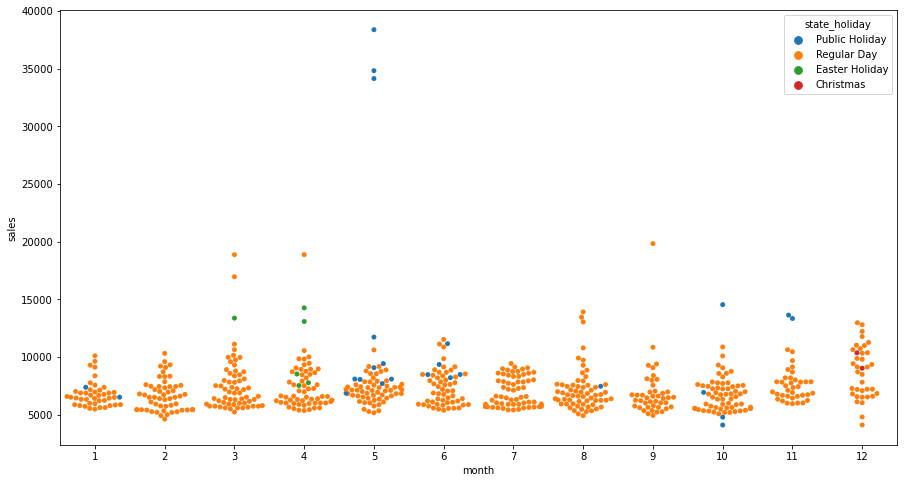

In [21]:
plt.figure(figsize=(15,8))
sns.swarmplot(data=holidays, x="month", y="sales", hue="state_holiday")

C:\Users\Alysson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alysson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alysson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alysson\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='month', ylabel='sales'>

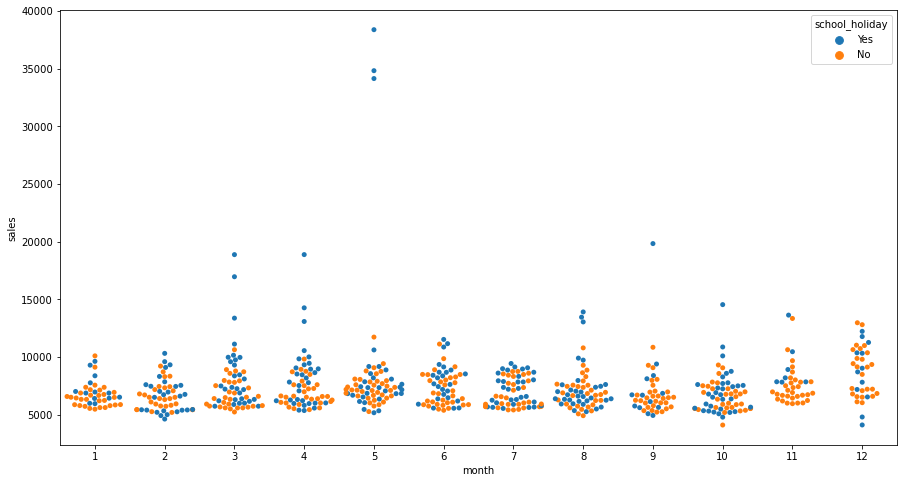

In [22]:
plt.figure(figsize=(15,8))
sns.swarmplot(data=holidays, x="month", y="sales", hue="school_holiday")

### Sales and promotions

In [23]:
pd.crosstab(data_eda['promo'], data_eda['promo2'], margins=True, margins_name = 'Total')

promo2,0,1,Total
promo,,,
0,234287,233176,467463
1,189005,187870,376875
Total,423292,421046,844338


<AxesSubplot:xlabel='date', ylabel='sales'>

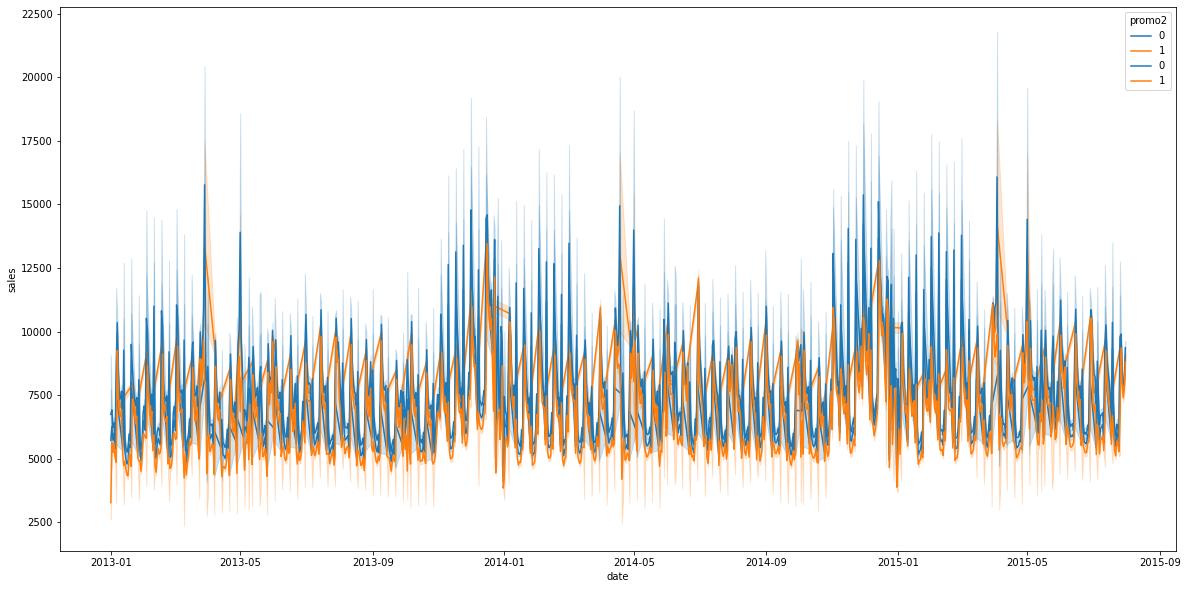

In [59]:
plt.figure(figsize=(20,10))
sns.lineplot(data = data_eda, x ="date", y = "sales", markers=True, hue = 'promo')
sns.lineplot(data = data_eda, x ="date", y = "sales", hue = 'promo2')

<AxesSubplot:xlabel='date', ylabel='sales'>

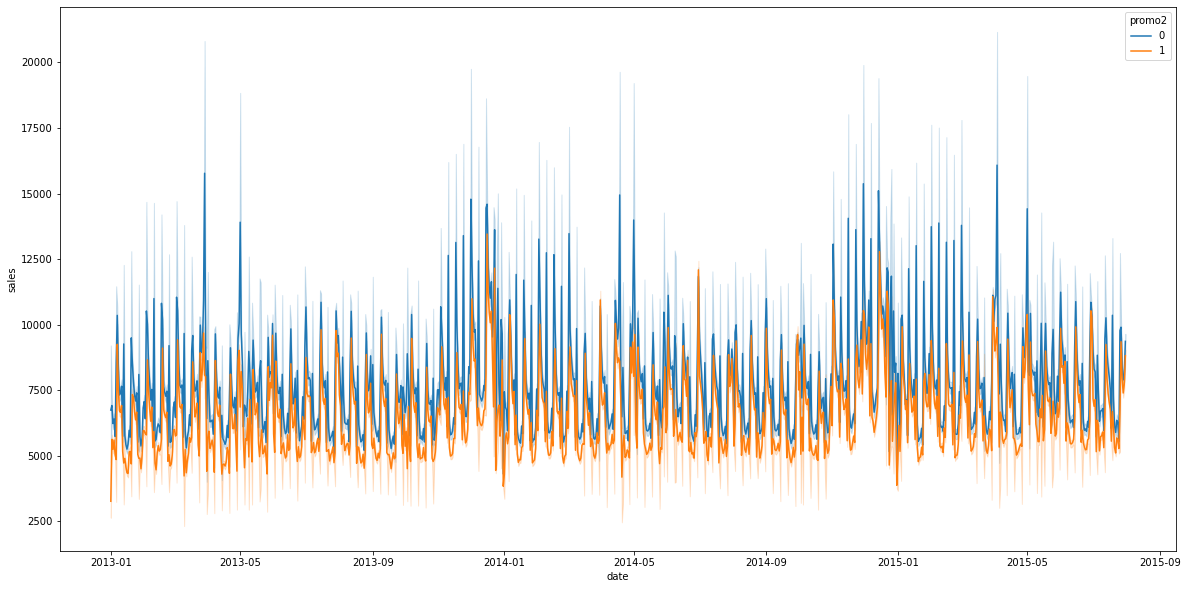

In [25]:
plt.figure(figsize=(20,10))
sns.lineplot(data = data_eda, x ="date", y = "sales", hue = 'promo2')

As expected, sales are strongly correlated with the number of customers. Another interesting information is the moderate correlation with the promo but weak with the promo2, which can be seen before, the extended promotions had a greater effect on sales compared to the standard promotion.

In [26]:
sns.factorplot(data = data_eda, x = 'month', y = "sales", col = 'day_of_week', hue = 'store_type', row = 'store_type') 

C:\Users\Alysson\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001E49F2A75E0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
store_817 = data.loc[(data['store']== 817) & (data['date']  >= '2013-12-01') & (data['date']  <= '2015-02-01'),['date','sales']]
store_307 = data.loc[(data['store']== 307) & (data['date']  >= '2013-12-01') & (data['date']  <= '2015-02-01'),['date','sales']]

fig1 = plt.figure(figsize=(30,15))
ax1 = fig1.add_subplot(211)
#ax1.lineplotplot(store_817['date'], store_817['sales'], '-')
sns.lineplot(x=store_817['date'], y=store_817['sales'], ax=ax1)
ax1.set_xlabel('Time')
ax1.set_ylabel('Sales')
ax1.set_title('Store 817(Best selling Rank) Sales Distribution')


fig2 = plt.figure(figsize=(30,15))
ax2 = fig2.add_subplot(211)
ax2.plot(store_307['date'], store_307['sales'], '-')
ax2.set_xlabel('Time')
ax2.set_ylabel('Sales')
ax2.set_title('Store 307(Worst selling Rank) Sales Distribution')

## Analise Multivariada

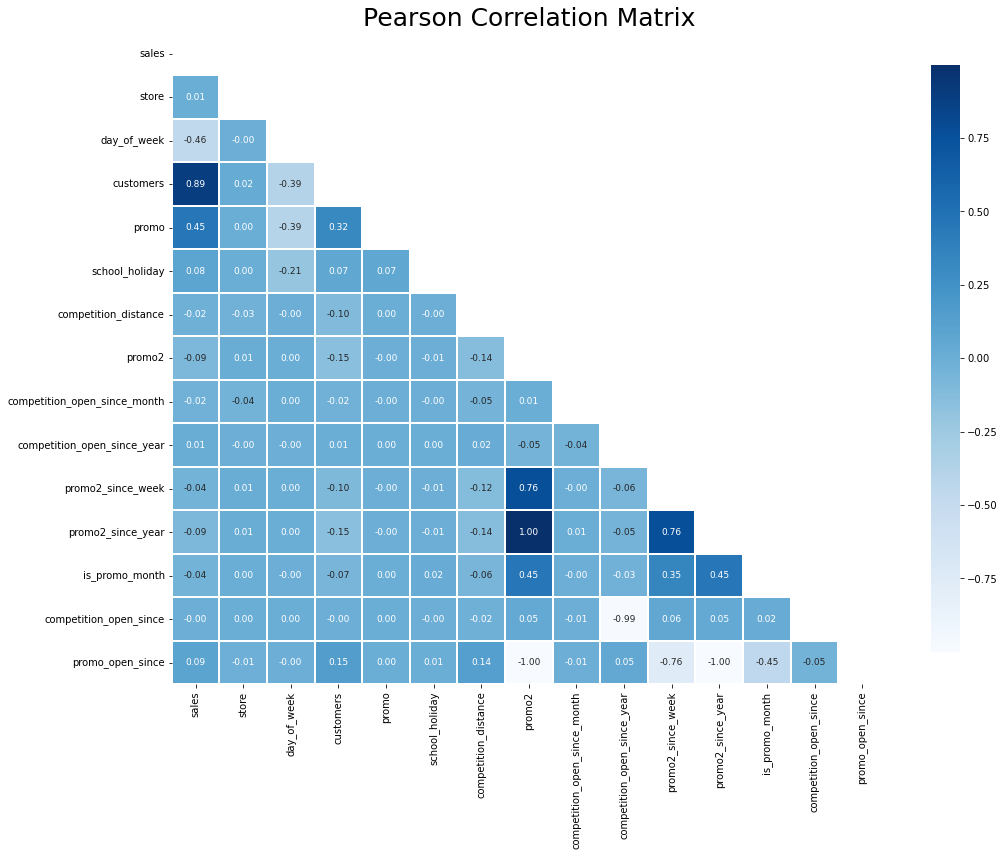

In [76]:
features = ['sales','store', 'day_of_week', 'customers', 'promo','school_holiday', 'competition_distance', 'promo2',
            'competition_open_since_month', 'competition_open_since_year', 
            'promo2_since_week', 'promo2_since_year','is_promo_month','competition_open_since','promo_open_since']





mask = np.zeros_like(data[features].corr(), dtype=bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))

plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(data[features].corr(),linewidths=0.25,fmt=".2f", cmap="Blues", linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});

As expected, sales are strongly correlated with customers. Another interesting information is the moderate correlation with the promo but weak with the promo2, which can be seen before, the extended promotions had a greater effect on sales compared to the standard promotion.